

### **NHS Trust Performance and Cataract Surgical Outcomes- A Five-Year National Cataract Audit**

## I. Introducion

<div style="text-align: justify; line-height: 1.5; padding-right:10px;">

Cataract is the leading cause of blindness in the world and cataract surgery is the most commonly performed operation by the UK National Health Service (NHS) with around 330 000 cataract operations performed per year in England. [1]
Comprehensive datasets for in-depth analyis are paramount to benchmark performance of the NHS Trusts, whos data has been collected for over 5 retrospectrive NHS years, and to identify trends in the performance based on the surgeon qualification, the number of complications, and pre-opearative or post-operative visual acuity loss. The exploratory data-analyis of the proposal of this research provided valuable insight to the single year cataract audit. The dataset used in the current analysis consists of 5 data files, one for each NHS years between 2017-2021, containing the audit information of 159 NHS Trusts. The aim of this notebook was to present an in-depth analyisis of the 43 NHS Trusts appeared in the five years analyis, to describe the change in the outcomes of cataract surgery. Furthermore to compare efectiveness of the compared trusts in managing the surgical volume with the minimal complication rates over five years. 

</div>


_**Keywords:**_

Cataract, National Audit, Visual Acuity, Operations,  NHS Trust


### **About Cataract**

<div style="text-align: justify; line-height: 1.5;">

Cataract is a common eye condition, in which the lens becomes progressively opaque, resulting in blurred vision
The procdedure is to remove the lens of the eye, and replace it with an artificial lens. While the cataract surgery is considered a safe, routine procedure, it has potential risks factors. The complications can range from mild discomfort, to vision loss.[2]
_**Figure 1:** Normal Eye vs Eye with Cataract_

<!-- ![My Picture](media/512px-Cataracts.png "Normal vs Cataract Eye") -->


<a lign="center" title="BruceBlaus, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Cataracts.png"><img width="256" alt="Cataracts" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Cataracts.png/256px-Cataracts.png"></a>



</div>


## II. Background



A substantial amount of research has been invested to the audit leading corneal disease, in the aim of preserving patient safety and the performance of the NHS Trusts.
A C Day et al observed the cataract operations performed between August 2006 and November 2010, using the CAtaract National Dataset. Their analysis found the median visual acuity improved from 0.50 before surgery to 0.10 logMAR after surgery. Comparison with the
Cataract National Dataset analysis reporting on outcomes between 2001 and 2006 in the UK, suggests the rate of PCR and proportions achieving good postoperative visual acuities have stabilised. Anonymised data on 180 114 eyes from 127 685 patients undergoing cataract surgery between August 2006 and November 2010 were collected prospectively from 28 sites. Median age at first eye surgery was 77.1 years, 36.9% cases had ocular co-pathology and 41.0% patients underwent cataract surgery on both eyes. Preoperative visual acuity was 0.30 logMAR or better in 32.0% first eyes and 47.7% second eyes. Postoperative best-measured visual acuity was 0.00 and 0.30 logMAR or better in 50.8 and 94.6% eyes without ocular co-pathology, and 32.5 and 79.9% in eyes with co-pathology.[3] Hu et al's analyis reveleaded that the incidence of dropped nucleus following cataract surgery was 0.17% (n = 292). Duration of follow-up was 25.5 months (mean), 18.5 months (median). There was a statistically significant difference in dropped nucleus rate between Residents (0.3%) and Faculty (0.14%) (x2 = 38.2, P < 0.001), but ensuing major complications rates were similar. [4]

After reviewing the literature on Cataract Audit, it is clear that the constant research can reveal new trends or patterns, that can preserve patient safety. The research questions of the _"NHS Trust Performance and Cataract Surgical Outcomes- A Five Year National Cataract Audit"_ are defined in table 1 below.

</div>

_**Table 2:** Research Questions_

| Question             |         Description                                                                       |
|----------------------|-------------------------------------------------------------------------------------------|
| Research Question 1  | What are there significant differences in patient outcomes or treatment effectiveness among the 43 NHS Trusts? |
| Research Question 2  | How has the quality of care changed over the 5 years?|
| Research Question 3  | Are there any trends or patterns in patient demographics or outcomes over the years?|



### III. Data Ethics

<div style="text-align: justify; line-height: 1.5;">

The Royal College of Ophthalmologists published the National Cataract Audit data acquired from the data.gov.uk domain, and was last updated on 09 August 2023. The topic is classified as Health Licence. The Licensor grants a worldwide, royalty-free, perpetual, non-exclusive licence to use the information subject to the conditions. This licence does not affect the freedom under fair dealing or fair use or any other copyright or database right exceptions and limitations.

The data contains public sector information licensed under the Open Government Licence (OGL) v3.0. The OGL does not cover the use of personal data. There is no need to register or apply to use the OGL. Users need to ensure that their use of information complies with OGL terms.  The dataset does not consist of personally identifiable information, nor can the grouping of the columns identify any individuals because the data focuses on the quality of the contributing NHS centres. It is impossible to aggregate or group the data to find identifiable information on this dataset. 
The surgical outcomes, same as other components of the datasets used, are not representing a single event, but the overall number of procedures trust-wise, therefore the clinical outcome cannot be misinterpreted which prevents any false prediction to compromise patient safety.

</div>

### IV. Methods

In [1]:
# Library Imports

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline
# this is to display plots in the notebook in line

In [3]:
# requirements.txt file
if os.path.exists('requirements.txt'):
    print("'requirements.txt' already exists.")
else:
    # Capture the pip freeze output
    output = !pip freeze

    # Write the output to requirements.txt
    with open('requirements.txt', 'w') as f:
        f.write('\n'.join(output))
    print("requirements.txt file is generated.")


'requirements.txt' already exists.


### Data Acquisition and Preprocessing

In [4]:
# Read in the data
df_y2 = pd.read_csv('National cataract audit year 2 data.csv')
df_y3 = pd.read_csv('National cataract audit year 3 data.csv')
df_y4 = pd.read_csv('National cataract audit year 4 data.csv')
df_y5 = pd.read_csv('National cataract audit year 5 data.csv')
df_y6 = pd.read_csv('National cataract audit year 6 data.csv')

In [5]:
df_y2 = pd.DataFrame(df_y2)
df_y3 = pd.DataFrame(df_y3)
df_y4 = pd.DataFrame(df_y4)
df_y5 = pd.DataFrame(df_y5)
df_y6 = pd.DataFrame(df_y6)

In [6]:
# Checking whether the trust names are the same in each dataset
datasets = [df_y2,df_y3, df_y4, df_y5, df_y6]
trust_name_columns_exist = all('TrustName' in df.columns for df in datasets)

In [7]:
# Standardising Trust Names
# Merging DataFrames with Common Trust Names
# Creating a Combined DataFrame

def standardize_trust_names(df):
    df['TrustName'] = df['TrustName'].str.title().str.strip()
    return df

df_y2['NHS Year'] = '2017'
df_y3['NHS Year'] = '2018'
df_y4['NHS Year'] = '2019'
df_y5['NHS Year'] = '2020'
df_y6['NHS Year'] = '2021'

df_y2_std = standardize_trust_names(df_y2)
df_y3_std = standardize_trust_names(df_y3)
df_y4_std = standardize_trust_names(df_y4)
df_y5_std = standardize_trust_names(df_y5)
df_y6_std = standardize_trust_names(df_y6)

datasets_std = [df_y2_std, 
                df_y3_std, 
                df_y4_std, 
                df_y5_std, 
                df_y6_std]

common_trusts_std = set(df_y2_std['TrustName'])

for df in datasets_std[1:]:
    common_trusts_std = common_trusts_std.intersection(set(df['TrustName'])) # intersection of all trust names

combined_dfs = [df[df['TrustName'].isin(common_trusts_std)] for df in datasets_std]
combined_df = pd.concat(combined_dfs, ignore_index=True)

print("Number of common trusts:", len(common_trusts_std))
print("Combined DataFrame shape:", combined_df.shape)

Number of common trusts: 43
Combined DataFrame shape: (215, 50)


In [8]:
assert df_y2_std['TrustName'].equals(df_y2_std['TrustName'].str.title().str.strip())
assert len(common_trusts_std) > 0
expected_rows = len(common_trusts_std) * len(datasets_std)
assert combined_df.shape[0] == expected_rows

In [9]:
combined_df

,TrustName,ODSCode,Country,ITCLocation,CentreNumber,NumberHESOperations,TimeFraction,NumberOperationsCA,CaseAscertainment,NumberEligibleOperations,...,CaseComplexityIndexVALoss,UnadjustedVALossRate,AdjustedVALossRate,NHS Year,PercentageOperationsCareerGrade,PercentageOperationsMoreExperiencedTrainees,PercentageOperationsLessExperiencedTrainees,Information,CentreType,ISTCLocation
0,Moorfields Eye Hospital Nhs Foundation Trust,RP6,ENGLAND,NaN,1,20566.0,0.997,20680.0,100.0,18658.0,...,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
1,The Newcastle Upon Tyne Hospitals Nhs Foundati...,RTD,ENGLAND,NaN,2,9014.0,0.997,8975.0,99.6,8761.0,...,0.77,0.75,0.87,2017,NaN,NaN,NaN,NaN,NaN,NaN
2,Norfolk And Norwich University Hospitals Nhs F...,RM1,ENGLAND,NaN,3,4621.0,0.997,4801.0,100.0,4407.0,...,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
3,Leeds Teaching Hospitals Nhs Trust,RR8,ENGLAND,NaN,4,4490.0,0.997,4749.0,100.0,4409.0,...,0.98,1.05,0.96,2017,NaN,NaN,NaN,NaN,NaN,NaN
4,Oxford University Hospitals Nhs Foundation Trust,RHW,ENGLAND,NaN,6,4337.0,0.997,4295.0,99.0,4229.0,...,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Kingston Hospital Nhs Foundation Trust,RAX,ENGLAND,NaN,74,2400.0,1.000,2153.0,89.7,2121.0,...,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NHS,NaN
211,Torbay And South Devon Nhs Foundation Trust,RA9,ENGLAND,NaN,77,2080.0,1.000,2062.0,99.1,1951.0,...,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NHS,NaN
212,Great Western Hospitals Nhs Foundation Trust,RN3,ENGLAND,NaN,78,1550.0,1.000,1386.0,89.4,1266.0,...,1.55,0.55,0.32,2021,NaN,NaN,NaN,NaN,NHS,NaN
213,Sherwood Forest Hospitals Nhs Foundation Trust,RK5,ENGLAND,NaN,83,1515.0,1.000,1468.0,96.9,1454.0,...,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NHS,NaN


### Histograms of the full cataract audit data set

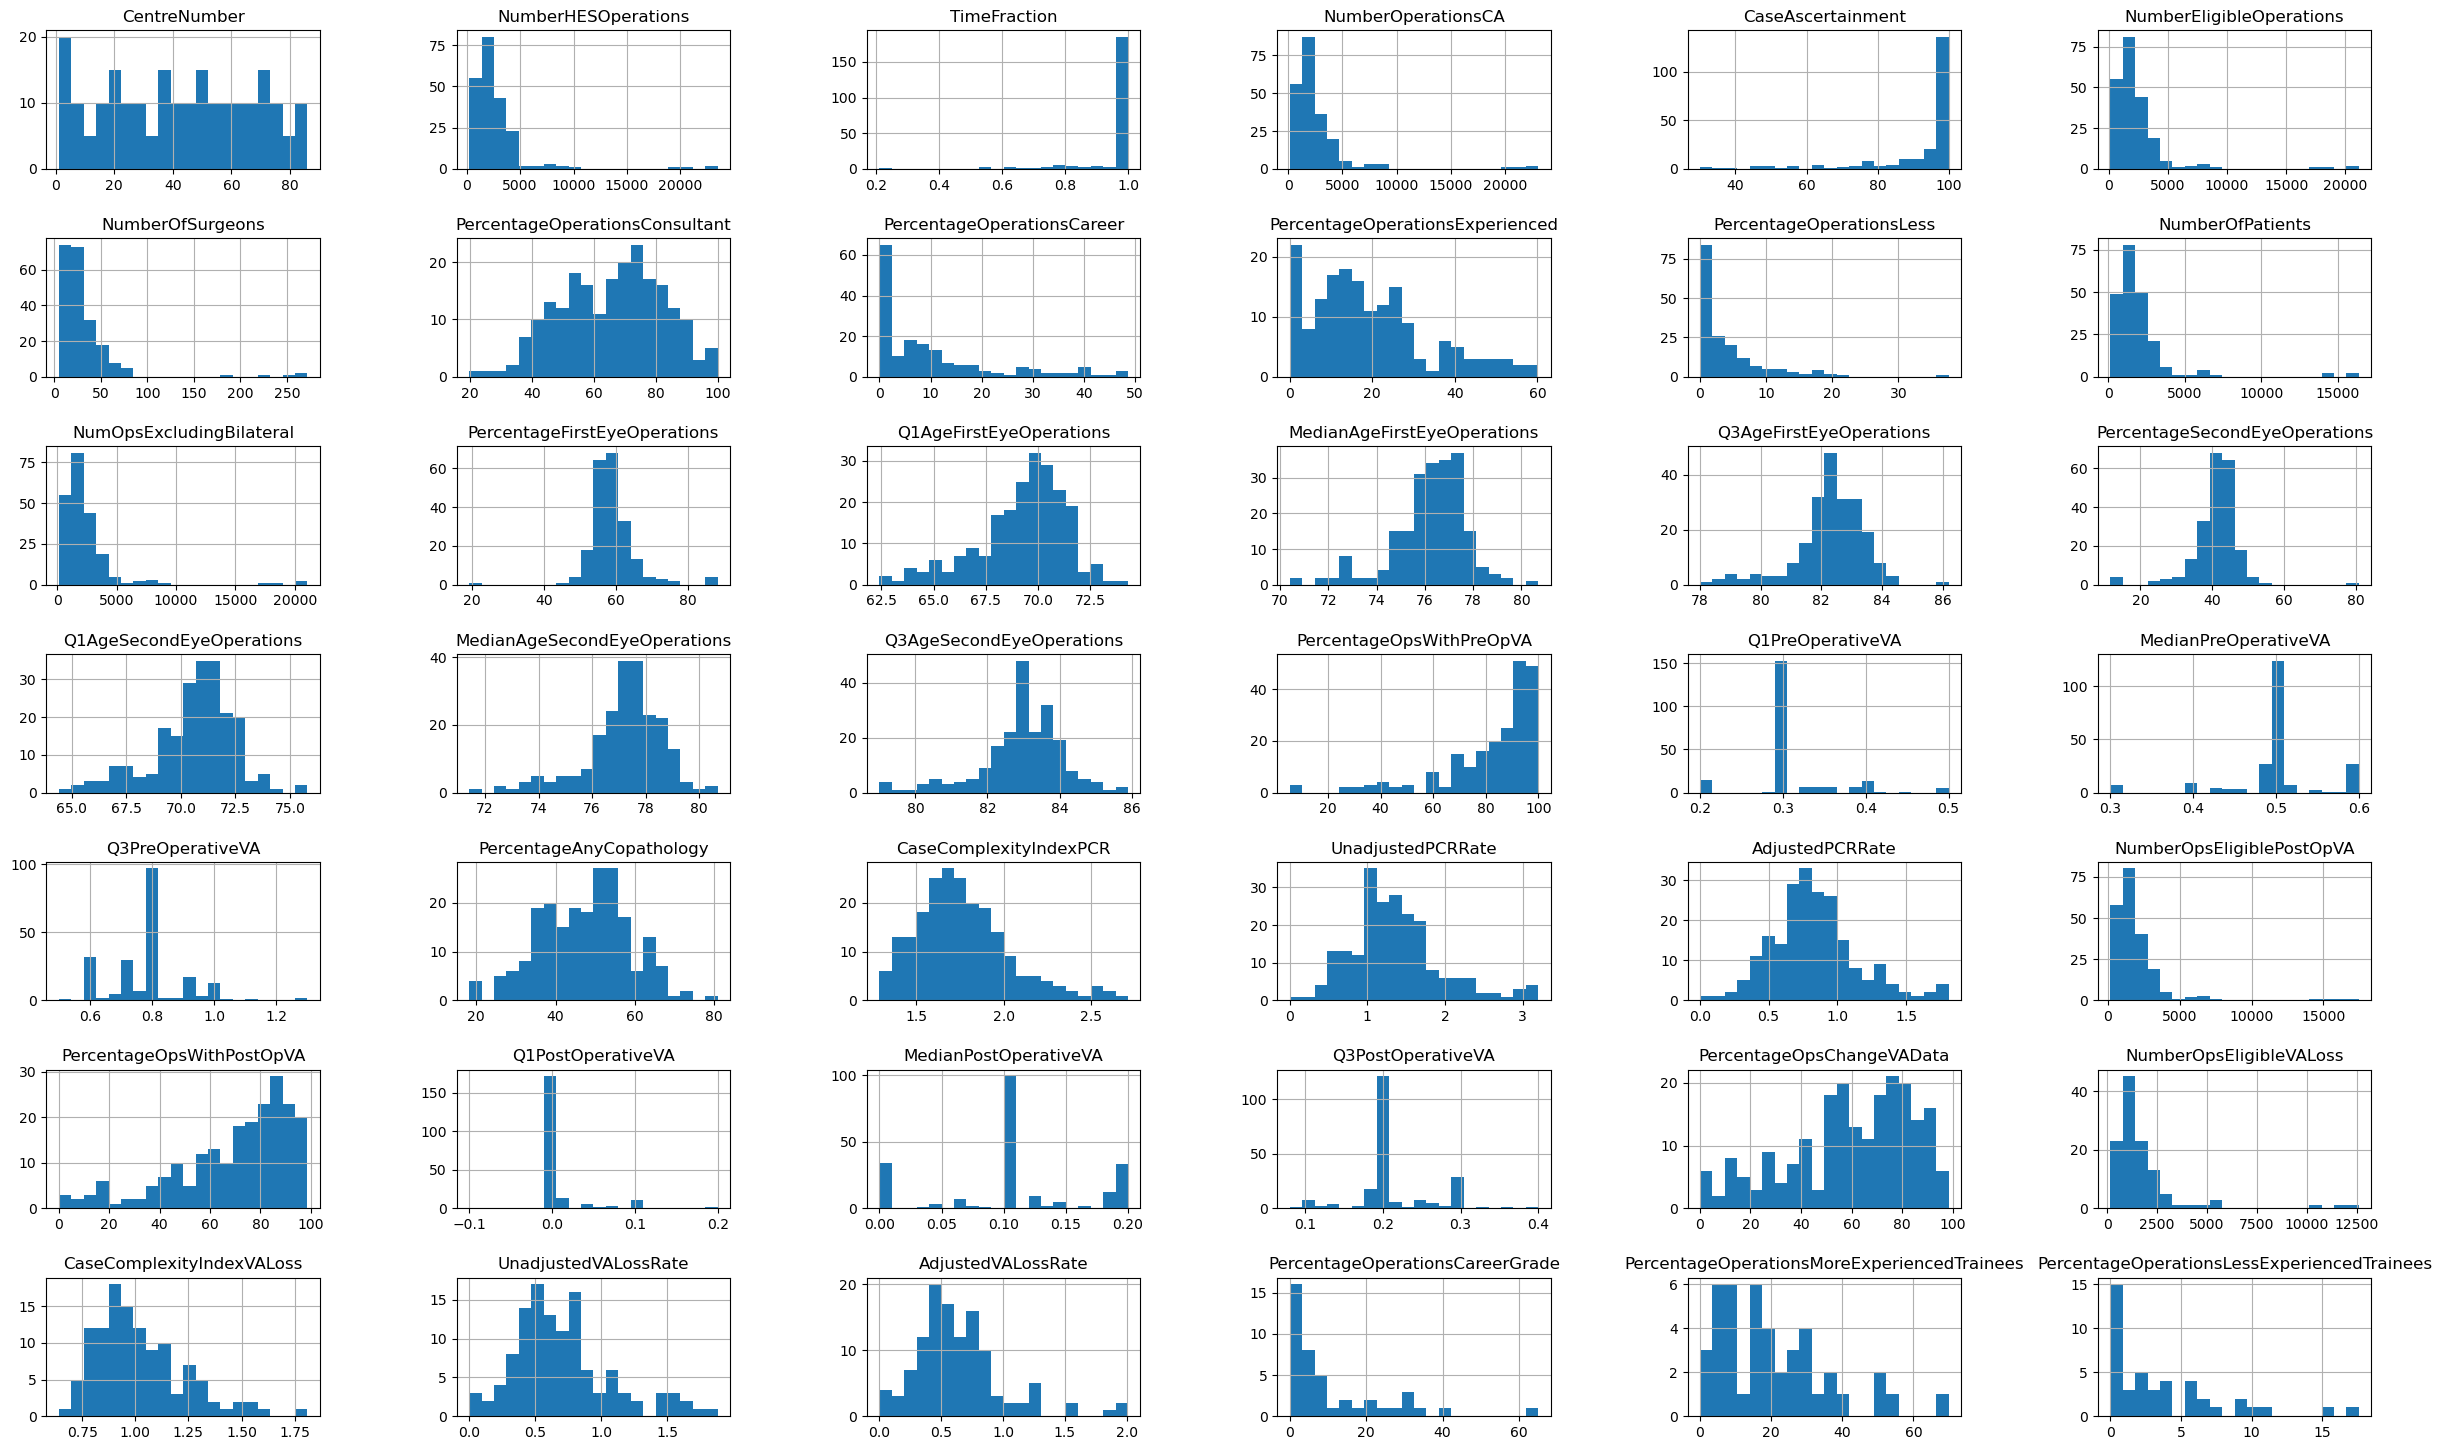

In [10]:
combined_df.hist(bins=20, figsize=(30,18))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [11]:
combined_df.describe()

,CentreNumber,NumberHESOperations,TimeFraction,NumberOperationsCA,CaseAscertainment,NumberEligibleOperations,NumberOfSurgeons,PercentageOperationsConsultant,PercentageOperationsCareer,PercentageOperationsExperienced,...,MedianPostOperativeVA,Q3PostOperativeVA,PercentageOpsChangeVAData,NumberOpsEligibleVALoss,CaseComplexityIndexVALoss,UnadjustedVALossRate,AdjustedVALossRate,PercentageOperationsCareerGrade,PercentageOperationsMoreExperiencedTrainees,PercentageOperationsLessExperiencedTrainees
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,172.000000,172.000000,...,210.000000,210.000000,215.000000,118.000000,118.000000,118.000000,118.000000,43.000000,43.000000,43.000000
mean,41.883721,2763.157254,0.965752,2603.776744,91.672093,2418.283721,32.223256,65.824651,10.445930,19.381977,...,0.103857,0.212143,59.690698,1754.042373,1.020085,0.706525,0.641017,10.927907,20.711628,3.674419
std,25.128836,3053.648334,0.099973,3044.369362,14.715151,2744.003833,36.343460,16.411911,12.439822,14.488183,...,0.061612,0.049781,24.733516,1884.297436,0.214956,0.374733,0.363749,14.022674,15.877435,4.242309
min,1.000000,222.000000,0.211000,143.000000,30.000000,142.000000,5.000000,19.700000,0.000000,0.000000,...,0.000000,0.080000,0.000000,155.000000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1370.500000,0.997000,1251.500000,91.500000,1171.000000,16.000000,52.700000,0.275000,9.175000,...,0.100000,0.200000,43.850000,912.000000,0.872500,0.452500,0.420000,0.350000,8.400000,0.100000
50%,43.000000,2115.836000,1.000000,1932.000000,98.400000,1829.000000,24.000000,67.500000,6.400000,16.300000,...,0.100000,0.200000,63.300000,1301.000000,0.980000,0.645000,0.560000,4.900000,17.300000,2.400000
75%,64.000000,3195.000000,1.000000,2858.500000,100.000000,2682.500000,37.500000,77.950000,14.300000,25.900000,...,0.130000,0.220000,79.000000,1957.500000,1.117500,0.842500,0.777500,16.400000,28.950000,5.750000
max,86.000000,23490.000000,1.000000,23070.000000,100.000000,21143.000000,272.000000,100.000000,48.600000,60.200000,...,0.200000,0.400000,98.400000,12596.000000,1.810000,1.880000,2.010000,65.000000,69.900000,17.600000


### Data Manipulation- Missing value treatment

In [12]:
missing_vals = combined_df.isnull().sum().sort_values(ascending=False)
print(missing_vals)

ISTCLocation                                   215
ITCLocation                                    215
Information                                    215
PercentageOperationsLessExperiencedTrainees    172
PercentageOperationsMoreExperiencedTrainees    172
PercentageOperationsCareerGrade                172
CentreType                                     129
NumberOpsEligibleVALoss                         97
AdjustedVALossRate                              97
UnadjustedVALossRate                            97
CaseComplexityIndexVALoss                       97
PercentageOperationsLess                        43
PercentageOperationsExperienced                 43
PercentageOperationsCareer                      43
Q3PostOperativeVA                                5
MedianPostOperativeVA                            5
Q1PostOperativeVA                                5
PercentageOpsWithPostOpVA                        2
NumberOpsEligiblePostOpVA                        2
MedianPreOperativeVA           

In [13]:
combined_df = combined_df.drop("ISTCLocation", axis =1)

In [14]:

missing_vals = combined_df.isnull().sum().sort_values(ascending=False)
print(missing_vals)

Information                                    215
ITCLocation                                    215
PercentageOperationsLessExperiencedTrainees    172
PercentageOperationsMoreExperiencedTrainees    172
PercentageOperationsCareerGrade                172
CentreType                                     129
AdjustedVALossRate                              97
UnadjustedVALossRate                            97
CaseComplexityIndexVALoss                       97
NumberOpsEligibleVALoss                         97
PercentageOperationsCareer                      43
PercentageOperationsLess                        43
PercentageOperationsExperienced                 43
Q3PostOperativeVA                                5
MedianPostOperativeVA                            5
Q1PostOperativeVA                                5
PercentageOpsWithPostOpVA                        2
NumberOpsEligiblePostOpVA                        2
MedianPreOperativeVA                             0
NHS Year                       

In [15]:
# To impute missing data if needed, only from the same TrustName
cols= ['PercentageOperationsLessExperiencedTrainees',
       'PercentageOperationsMoreExperiencedTrainees',
       'PercentageOperationsCareerGrade',
       'AdjustedVALossRate',
       'UnadjustedVALossRate',
       'CaseComplexityIndexVALoss',
       'NumberOpsEligibleVALoss',
       'PercentageOperationsCareer',
       'PercentageOperationsLess',
       'PercentageOperationsExperienced',
       'Q3PostOperativeVA',
       'MedianPostOperativeVA',
       'Q1PostOperativeVA',
       'PercentageOpsWithPostOpVA',
       'NumberOpsEligiblePostOpVA',       
       ]

imputed_df = combined_df.copy()
imputed_df[cols] = imputed_df.groupby('TrustName')[cols].transform(
    lambda x: x.fillna(x.median())
)

In [16]:
missing_vals = imputed_df.isnull().sum().sort_values(ascending=False)
print(missing_vals)

Information                                    215
ITCLocation                                    215
CentreType                                     129
AdjustedVALossRate                              45
UnadjustedVALossRate                            45
CaseComplexityIndexVALoss                       45
NumberOpsEligibleVALoss                         45
PercentageOpsWithPostOpVA                        0
MedianPreOperativeVA                             0
Q3PreOperativeVA                                 0
PercentageAnyCopathology                         0
CaseComplexityIndexPCR                           0
UnadjustedPCRRate                                0
AdjustedPCRRate                                  0
NumberOpsEligiblePostOpVA                        0
PercentageOpsChangeVAData                        0
Q1PostOperativeVA                                0
MedianPostOperativeVA                            0
Q3PostOperativeVA                                0
PercentageOpsWithPreOpVA       

In [17]:
for col in cols:
    overall_median = imputed_df[col].median()
    imputed_df[col] = imputed_df[col].fillna(overall_median)

In [18]:
missing_vals = imputed_df.isnull().sum().sort_values(ascending=False)
print(missing_vals)

Information                                    215
ITCLocation                                    215
CentreType                                     129
MedianPostOperativeVA                            0
MedianPreOperativeVA                             0
Q3PreOperativeVA                                 0
PercentageAnyCopathology                         0
CaseComplexityIndexPCR                           0
UnadjustedPCRRate                                0
AdjustedPCRRate                                  0
NumberOpsEligiblePostOpVA                        0
PercentageOpsWithPostOpVA                        0
Q1PostOperativeVA                                0
PercentageOpsChangeVAData                        0
Q3PostOperativeVA                                0
PercentageOpsWithPreOpVA                         0
NumberOpsEligibleVALoss                          0
CaseComplexityIndexVALoss                        0
UnadjustedVALossRate                             0
AdjustedVALossRate             

In [19]:
imputed_df.shape

(215, 49)

In [20]:
imputed_df.to_csv('imputed_df.csv', index=False)

In [21]:
imputed_df.head()

,TrustName,ODSCode,Country,ITCLocation,CentreNumber,NumberHESOperations,TimeFraction,NumberOperationsCA,CaseAscertainment,NumberEligibleOperations,...,NumberOpsEligibleVALoss,CaseComplexityIndexVALoss,UnadjustedVALossRate,AdjustedVALossRate,NHS Year,PercentageOperationsCareerGrade,PercentageOperationsMoreExperiencedTrainees,PercentageOperationsLessExperiencedTrainees,Information,CentreType
0,Moorfields Eye Hospital Nhs Foundation Trust,RP6,ENGLAND,NaN,1,20566.0,0.997,20680.0,100.0,18658.0,...,11383.0,0.80,0.37,0.42,2017,4.7,51.3,1.7,NaN,NaN
1,The Newcastle Upon Tyne Hospitals Nhs Foundati...,RTD,ENGLAND,NaN,2,9014.0,0.997,8975.0,99.6,8761.0,...,5636.0,0.77,0.75,0.87,2017,0.5,30.4,2.0,NaN,NaN
2,Norfolk And Norwich University Hospitals Nhs F...,RM1,ENGLAND,NaN,3,4621.0,0.997,4801.0,100.0,4407.0,...,1330.0,0.97,0.65,0.57,2017,9.5,25.6,0.1,NaN,NaN
3,Leeds Teaching Hospitals Nhs Trust,RR8,ENGLAND,NaN,4,4490.0,0.997,4749.0,100.0,4409.0,...,2862.0,0.98,1.05,0.96,2017,0.1,37.0,6.1,NaN,NaN
4,Oxford University Hospitals Nhs Foundation Trust,RHW,ENGLAND,NaN,6,4337.0,0.997,4295.0,99.0,4229.0,...,1330.0,0.97,0.65,0.57,2017,0.0,38.7,2.4,NaN,NaN


In [22]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   TrustName                                    215 non-null    object 
 1   ODSCode                                      215 non-null    object 
 2   Country                                      215 non-null    object 
 3   ITCLocation                                  0 non-null      object 
 4   CentreNumber                                 215 non-null    int64  
 5   NumberHESOperations                          215 non-null    float64
 6   TimeFraction                                 215 non-null    float64
 7   NumberOperationsCA                           215 non-null    float64
 8   CaseAscertainment                            215 non-null    float64
 9   NumberEligibleOperations                     215 non-null    float64
 10  Nu

In [23]:
pd.set_option('display.max_colwidth', None)

dataTypes = {
    "Variable Type": ["int64", 
                      "float64", 
                      "object"],
                      
    "Description": ["A 64-bit signed integer", 
                    "Python float values are represented as 64-bit double-precision values", 
                    "The data actually stored in object arrays are references to Python objects, not the objects themselves"]
}

dt = pd.DataFrame(dataTypes)
dt

,Variable Type,Description
0,int64,A 64-bit signed integer
1,float64,Python float values are represented as 64-bit double-precision values
2,object,"The data actually stored in object arrays are references to Python objects, not the objects themselves"


In [24]:
dropped_df = combined_df.dropna(subset=['AdjustedVALossRate',
                                        'UnadjustedVALossRate', 
                                        'CaseComplexityIndexVALoss', 
                                        'NumberOpsEligibleVALoss'])

In [25]:
dropped_df.shape

(118, 49)

### V. Analysis

In [26]:
# Changing float to int
combined_df['NumberHESOperations'] = combined_df['NumberHESOperations'].round().astype('int64') # round and convert to int64
combined_df['NumberEligibleOperations'] = combined_df['NumberEligibleOperations'].round().astype('int64')
combined_df['NumberOperationsCA'] = combined_df['NumberOperationsCA'].round().astype('int64')

dropped_df['NumberHESOperations'] = dropped_df['NumberHESOperations'].round().astype('int64') # round and convert to int64
dropped_df['NumberEligibleOperations'] = dropped_df['NumberEligibleOperations'].round().astype('int64')
dropped_df['NumberOperationsCA'] = dropped_df['NumberOperationsCA'].round().astype('int64')

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_86445/1872999359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df['NumberHESOperations'] = dropped_df['NumberHESOperations'].round().astype('int64') # round and convert to int64
/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_86445/1872999359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df['NumberEligibleOperations'] = dropped_df['NumberEligibleOperations'].round().astype('int64')
/var/folders/n6/lht5v8ls6fb4q

### Modular Aggregation function

In [27]:
def print_aggregated_data(data, agg):
    for column, (label, method) in agg.items():
        res = getattr(data[column], method)() # get the method from the column
        print(f"{label}: {res}")

agg = {
    'NumberOfPatients': ('Total Patients', 'sum'),
    'NumberOfSurgeons': ('Total Surgeons', 'sum'),
    'TrustName': ('Unique Trusts', 'nunique'),
    'NumberHESOperations': ('HES Operations', 'sum'),
    'NumberEligibleOperations': ('Eligible Operations', 'sum')

}

print_aggregated_data(combined_df, agg)
print("The percentage of total vs. eligible operations: ", combined_df['NumberEligibleOperations'].sum() / combined_df['NumberOperationsCA'].sum() * 100 , "%")
print("The average number of operations per surgeon: " , combined_df['NumberHESOperations'].sum() / combined_df['NumberOfSurgeons'].sum())


Total Patients: 426524.0
Total Surgeons: 6928.0
Unique Trusts: 43
HES Operations: 594076
Eligible Operations: 519931
The percentage of total vs. eligible operations:  92.87600122898402 %
The average number of operations per surgeon:  85.75


In [28]:
print_aggregated_data(dropped_df, agg)
print("The percentage of total vs. eligible operations: ", dropped_df['NumberEligibleOperations'].sum() / dropped_df['NumberOperationsCA'].sum() * 100 , "%")
print("The average number of operations per surgeon: " , dropped_df['NumberHESOperations'].sum() / dropped_df['NumberOfSurgeons'].sum())

Total Patients: 260463.0
Total Surgeons: 4076.0
Unique Trusts: 34
HES Operations: 357196
Eligible Operations: 322216
The percentage of total vs. eligible operations:  92.61076381404038 %
The average number of operations per surgeon:  87.63395485770363


In [29]:

firstEye = imputed_df['MedianAgeFirstEyeOperations']
secondEye = imputed_df['MedianAgeSecondEyeOperations']

# Function to aggregate and print the results
def aggregate_and_print(objects, methods):
    
    for object_name, object_instance in objects.items():
        for method_name in methods:
            method = getattr(object_instance, method_name)
            print(f"{object_name}.{method_name}(): {method()}")

eyes = {
    "firstEye": firstEye,
    "secondEye": secondEye
}

methods = ["min", "max"]

In [30]:
aggregate_and_print(eyes, methods)

firstEye.min(): 70.4
firstEye.max(): 80.7
secondEye.min(): 71.4
secondEye.max(): 80.7


In [31]:
total_operations = imputed_df['NumberHESOperations'].sum()

country_data = imputed_df.groupby('Country')['NumberHESOperations'].sum().reset_index()
country_data['% Of Operations'] = country_data['NumberHESOperations'].apply(lambda x: (x / total_operations) * 100)
country_data = pd.DataFrame(country_data)
country_data

,Country,NumberHESOperations,% Of Operations
0,ENGLAND,594078.8096,100.0


In [32]:
# function to print out data from sorted cols in ascending order
def find_trust(data, sort_cols, ascending_order):

    sorted_data = data.sort_values(by=sort_cols, ascending=ascending_order)
    result = sorted_data.iloc[0]
    trustname = result['TrustName']
    consultant_val = result[sort_cols[0]]
    postop_va_val = result[sort_cols[1]]

    print("Trustname:", trustname)
    print("Value for '{}':".format(sort_cols[0]), consultant_val, '%')
    print("Value for '{}':".format(sort_cols[1]), postop_va_val, '%')

find_trust(imputed_df, ['PercentageOperationsConsultant', 'PercentageOpsWithPostOpVA'], [True, False])
find_trust(imputed_df, ['PercentageOperationsConsultant', 'PercentageOpsWithPostOpVA'], [False, True])


Trustname: Oxford University Hospitals Nhs Foundation Trust
Value for 'PercentageOperationsConsultant': 19.7 %
Value for 'PercentageOpsWithPostOpVA': 64.3 %
Trustname: Yeovil District Hospital Nhs Foundation Trust
Value for 'PercentageOperationsConsultant': 100.0 %
Value for 'PercentageOpsWithPostOpVA': 78.9 %


In [33]:
data_quart = imputed_df[['Q1AgeFirstEyeOperations', 
                         'Q1AgeSecondEyeOperations', 
                         'Q3AgeFirstEyeOperations', 
                         'Q3AgeSecondEyeOperations'
                        ]].sum()
data_quart

Q1AgeFirstEyeOperations     14890.6
Q1AgeSecondEyeOperations    15179.2
Q3AgeFirstEyeOperations     17693.4
Q3AgeSecondEyeOperations    17834.0
dtype: float64

### Plot of the times-series on the number of patients.

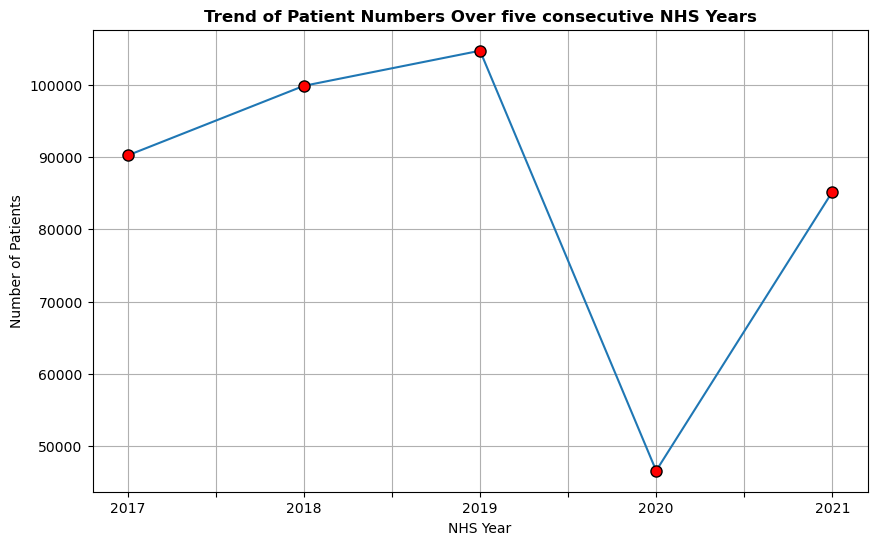

In [34]:
def plot_trend(dataframe, column_name, title, y_label):
    
    dataframe.groupby('NHS Year')[column_name].sum().plot(
        kind='line', 
        marker='o', 
        markeredgecolor='black', 
        markerfacecolor='red', 
        markersize=8, 
        figsize=(10,6)
    )

    plt.title(title, fontweight='bold')
    plt.xlabel('NHS Year')
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

plot_trend(combined_df, 'NumberOfPatients', 'Trend of Patient Numbers Over five consecutive NHS Years', 'Number of Patients')
# Add difference from Data Visualization 

## Aggregated Line Chart using Plotly

In [35]:
def create_aggregated_line_chart(df, group_column, agg_columns, agg_func='mean', 
                                chart_title='Yearly Trends', y_axis_title='Value', 
                                legend_title='Legend'):
    """
    Create a line chart with aggregated data.
    :param df: pandas DataFrame containing the data
    :param group_column: the column to group by (e.g., 'NHS Year')
    :param agg_columns: list of columns to aggregate and plot
    :param agg_func: the aggregation function (default is 'mean')
    :param chart_title: title of the chart
    :param y_axis_title: title of the y-axis
    :param legend_title: title of the legend
    :return: Plotly figure object
    """
    
    # Aggregate the data
    if agg_func == 'mean':
        df_agg = df.groupby(group_column).mean().reset_index()
    elif agg_func == 'sum':
        df_agg = df.groupby(group_column).sum().reset_index()
    elif agg_func == 'median':
        df_agg = df.groupby(group_column).median().reset_index()
    else:
        df_agg = df.groupby(group_column).agg(agg_func).reset_index()
    
    fig = go.Figure()
    
    # Add a trace for each aggregated column
    for column in agg_columns:
        fig.add_trace(go.Scatter(x=df_agg[group_column], 
                                 y=df_agg[column], 
                                 mode='lines+markers', 
                                 name=column))

    # Update the layout of the figure
    fig.update_layout(
        title=chart_title,
        xaxis_title=group_column,
        yaxis_title=y_axis_title,
        legend_title=legend_title,
        hovermode='x unified'
    )
    
    return fig

In [36]:
agg_columns = [
'PercentageOperationsConsultant', 
'PercentageOperationsCareer', 
'PercentageOperationsExperienced', 
'PercentageOperationsLess'
]

fig = create_aggregated_line_chart(df=imputed_df, 
                                   group_column='NHS Year', 
                                   agg_columns=agg_columns, 
                                   agg_func='mean', 
                                   chart_title='Yearly Percentage of Operations by Surgeon Type', 
                                   y_axis_title='Percentage', 
                                   legend_title='Surgeon Type')

# Show the figure
fig.show()

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_86445/1546901663.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(group_column).mean().reset_index()


In [37]:
# Define the columns you want to aggregate and plot
agg_columns = [
    'Q1PostOperativeVA', 
    'Q3PostOperativeVA',
    'Q1PreOperativeVA',
    'Q3PreOperativeVA'
]

# Create the figure with custom titles
fig = create_aggregated_line_chart(df=imputed_df, 
                                   group_column='NHS Year', 
                                   agg_columns=agg_columns, 
                                   agg_func='mean',  # Or use 'median' if that's more appropriate for quartile data
                                   chart_title='Yearly Quartiles of Pre-Operative and Post-Operative VA', 
                                   y_axis_title='Visual Acuity (VA)', 
                                   legend_title='VA Quartiles')

# Show the figure
fig.show()

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_86445/1546901663.py:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [38]:
trust = imputed_df['CentreType'].value_counts()
trust

NHS    86
Name: CentreType, dtype: int64

### Changes over time analysis

In [39]:
def calculate_max_yearly_change_with_year(df, column_name):
    """
    Calculate the maximum absolute year-to-year change and the percentage change 
    for a given column in the data, including the year when the change occurred.

    Params:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the column for which to calculate the changes.

    Returns:
    DataFrame: A DataFrame with the maximum change, percentage change, and the year 
               of the change for each trust, sorted in descending order by the absolute change.
    """

    # Grouping the data by TrustName and NHS Year and calculating the total for each year
    yearly_totals = df.groupby(['TrustName', 'NHS Year'])[column_name].sum().reset_index()

    # Calculating year-to-year absolute changes for each trust
    yearly_changes = yearly_totals.groupby('TrustName')[column_name].diff().abs()

    # Calculating the previous year's value for percentage calculation
    previous_values = yearly_totals.groupby('TrustName')[column_name].shift(1)
    percentage_changes = (yearly_changes / previous_values) * 100

    # Adding these changes back to the original DataFrame
    yearly_totals['YearlyChange'] = yearly_changes
    yearly_totals['PercentageChange'] = percentage_changes

    # Identifying the row with the maximum change for each trust
    max_change_rows = yearly_totals.loc[yearly_totals.groupby('TrustName')['YearlyChange'].idxmax()]
    max_change_display = max_change_rows[['TrustName', 'NHS Year', 'YearlyChange', 'PercentageChange']].sort_values(by='YearlyChange', ascending=False)

    return max_change_display

In [40]:
max_changes_number_operations_with_year = calculate_max_yearly_change_with_year(imputed_df, 'AdjustedPCRRate')
max_changes_number_operations_with_year.head()  


,TrustName,NHS Year,YearlyChange,PercentageChange
211,Yeovil District Hospital Nhs Foundation Trust,2018,1.04,155.223881
151,Salisbury Nhs Foundation Trust,2018,0.87,48.066298
74,Harrogate And District Nhs Foundation Trust,2021,0.85,inf
174,The Hillingdon Hospitals Nhs Foundation Trust,2021,0.82,160.784314
31,County Durham And Darlington Nhs Foundation Trust,2018,0.82,55.782313


In [41]:
max_changes_number_operations_with_year = calculate_max_yearly_change_with_year(imputed_df, 'AdjustedVALossRate')
max_changes_number_operations_with_year.head() 

,TrustName,NHS Year,YearlyChange,PercentageChange
171,The Hillingdon Hospitals Nhs Foundation Trust,2018,1.47,74.242424
209,"Wrightington, Wigan And Leigh Nhs Foundation Trust",2021,1.24,61.691542
204,Wirral University Teaching Hospital Nhs Foundation Trust,2021,0.80,62.500000
168,Southport And Ormskirk Hospital Nhs Trust,2020,0.68,60.176991
83,Isle Of Wight Nhs Trust,2020,0.65,41.935484


In [42]:
max_changes_number_operations_with_year = calculate_max_yearly_change_with_year(imputed_df, 'NumberOfPatients')
max_changes_number_operations_with_year.head()  

,TrustName,NHS Year,YearlyChange,PercentageChange
113,Moorfields Eye Hospital Nhs Foundation Trust,2020,9807.0,59.937660
178,The Newcastle Upon Tyne Hospitals Nhs Foundation Trust,2020,3081.0,48.412948
103,Leeds Teaching Hospitals Nhs Trust,2020,2645.0,81.159865
93,King'S College Hospital Nhs Foundation Trust,2020,2616.0,56.005138
118,Norfolk And Norwich University Hospitals Nhs Foundation Trust,2020,2320.0,76.015727


In [43]:
max_changes_number_operations_with_year = calculate_max_yearly_change_with_year(imputed_df, 'PercentageOperationsConsultant')
max_changes_number_operations_with_year.head()  

,TrustName,NHS Year,YearlyChange,PercentageChange
168,Southport And Ormskirk Hospital Nhs Trust,2020,43.2,156.521739
203,Wirral University Teaching Hospital Nhs Foundation Trust,2020,29.7,63.597430
134,Nottingham University Hospitals Nhs Trust,2021,27.8,72.965879
71,Harrogate And District Nhs Foundation Trust,2018,26.7,34.451613
34,County Durham And Darlington Nhs Foundation Trust,2021,24.8,33.558863


In [44]:
max_changes_number_operations_with_year = calculate_max_yearly_change_with_year(imputed_df, 'MedianAgeFirstEyeOperations')
max_changes_number_operations_with_year.head() 

,TrustName,NHS Year,YearlyChange,PercentageChange
103,Leeds Teaching Hospitals Nhs Trust,2020,2.4,3.170410
203,Wirral University Teaching Hospital Nhs Foundation Trust,2020,2.2,2.827763
79,Imperial College Healthcare Nhs Trust,2021,2.2,3.125000
189,United Lincolnshire Hospitals Nhs Trust,2021,2.0,2.624672
124,North West Anglia Nhs Foundation Trust,2021,1.9,2.536716


In [45]:
max_changes_number_operations_with_year = calculate_max_yearly_change_with_year(imputed_df, 'MedianAgeSecondEyeOperations')
max_changes_number_operations_with_year.head() 

,TrustName,NHS Year,YearlyChange,PercentageChange
188,United Lincolnshire Hospitals Nhs Trust,2020,2.9,3.815789
29,Chesterfield Royal Hospital Nhs Foundation Trust,2021,2.8,3.664921
203,Wirral University Teaching Hospital Nhs Foundation Trust,2020,2.4,3.057325
168,Southport And Ormskirk Hospital Nhs Trust,2020,2.3,2.929936
174,The Hillingdon Hospitals Nhs Foundation Trust,2021,2.1,2.713178


In [46]:
max_changes_number_operations_with_year = calculate_max_yearly_change_with_year(imputed_df, 'NumberOfSurgeons')
max_changes_number_operations_with_year.head() 

,TrustName,NHS Year,YearlyChange,PercentageChange
113,Moorfields Eye Hospital Nhs Foundation Trust,2020,78.0,29.545455
199,University Hospitals Coventry And Warwickshire Nhs Trust,2021,22.0,70.967742
131,Nottingham University Hospitals Nhs Trust,2018,18.0,64.285714
94,King'S College Hospital Nhs Foundation Trust,2021,17.0,29.824561
18,Bradford Teaching Hospitals Nhs Foundation Trust,2020,16.0,48.484848


### Colleration Matrix for surgical performance data

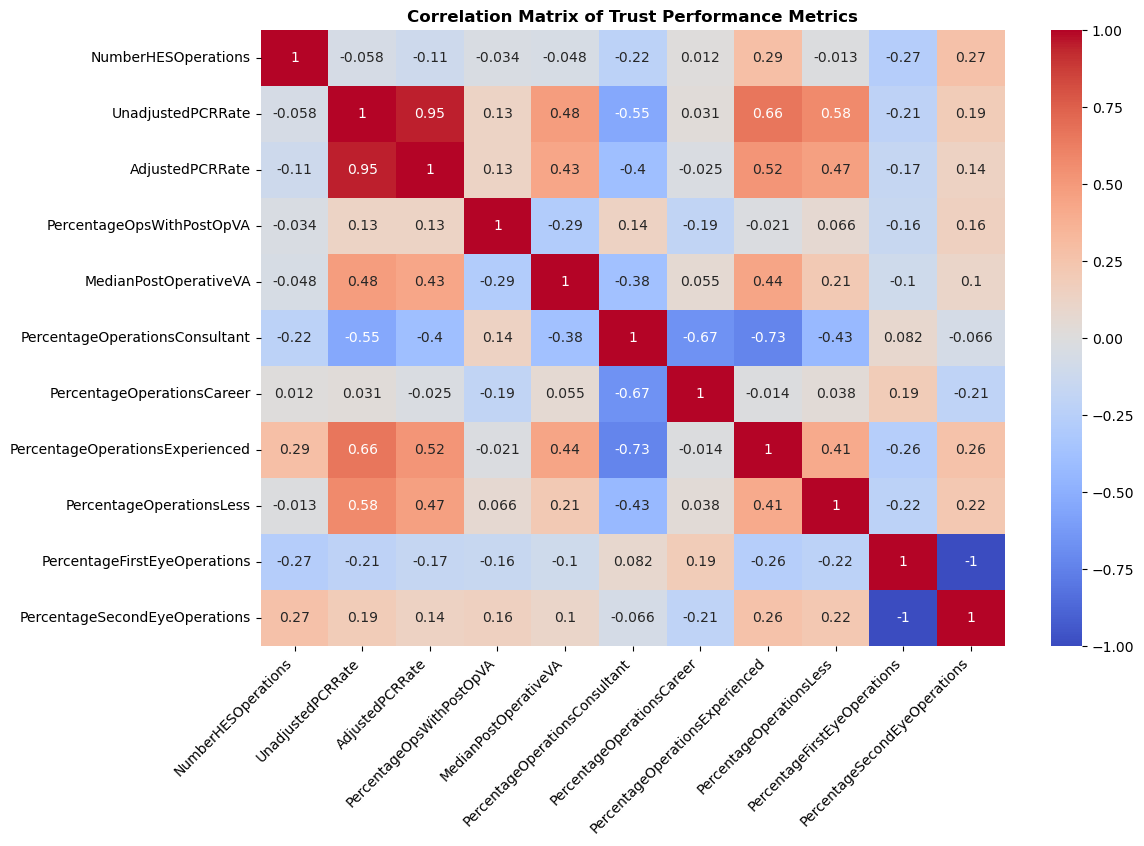

In [47]:
performance_cols = [
    'TrustName', 
    'NumberHESOperations', 
    'UnadjustedPCRRate', 
    'AdjustedPCRRate', 
    'PercentageOpsWithPostOpVA',
    'MedianPostOperativeVA', 
    'PercentageOperationsConsultant',
    'PercentageOperationsCareer',
    'PercentageOperationsExperienced',
    'PercentageOperationsLess',
    'PercentageFirstEyeOperations',
    'PercentageSecondEyeOperations'
]

# Creating a subset of the dataframe with the extended columns
performance_df = df[performance_cols]

# Grouping data by TrustName and calculating the mean for each performance metric
trust_performance = performance_df.groupby('TrustName').mean()

# For a more detailed analysis, we can look at correlations between various factors
correlation_matrix = trust_performance.corr()

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Trust Performance Metrics', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Predictive Models



This section comprises of linear regression techniques to attempt to predict the future number of patients, and the number of operations with visual acuity loss.

In [48]:
corr_matrix = imputed_df.corr()
threshold = 0.85
high_corr = [(col, row) for col in corr_matrix.columns
             for row in corr_matrix.index 
             if (abs(corr_matrix[col][row]) > threshold) & (col != row)]

for i in high_corr:
    print(i)

('NumberHESOperations', 'NumberOperationsCA')
('NumberHESOperations', 'NumberEligibleOperations')
('NumberHESOperations', 'NumberOfSurgeons')
('NumberHESOperations', 'NumberOfPatients')
('NumberHESOperations', 'NumOpsExcludingBilateral')
('NumberHESOperations', 'NumberOpsEligiblePostOpVA')
('NumberHESOperations', 'NumberOpsEligibleVALoss')
('NumberOperationsCA', 'NumberHESOperations')
('NumberOperationsCA', 'NumberEligibleOperations')
('NumberOperationsCA', 'NumberOfSurgeons')
('NumberOperationsCA', 'NumberOfPatients')
('NumberOperationsCA', 'NumOpsExcludingBilateral')
('NumberOperationsCA', 'NumberOpsEligiblePostOpVA')
('NumberOperationsCA', 'NumberOpsEligibleVALoss')
('NumberEligibleOperations', 'NumberHESOperations')
('NumberEligibleOperations', 'NumberOperationsCA')
('NumberEligibleOperations', 'NumberOfSurgeons')
('NumberEligibleOperations', 'NumberOfPatients')
('NumberEligibleOperations', 'NumOpsExcludingBilateral')
('NumberEligibleOperations', 'NumberOpsEligiblePostOpVA')
('Numb

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_86445/4286318181.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



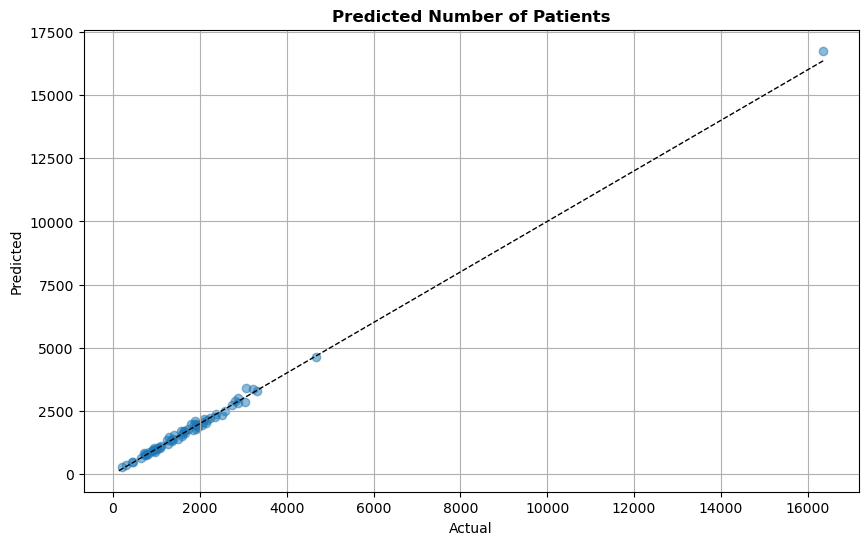

In [49]:
# Selecting relevant columns for the model
predictor_columns = [
    'NumberOperationsCA',
    'NumberEligibleOperations',
   'NumOpsExcludingBilateral',
   'NumberOpsEligiblePostOpVA',
   'NumberHESOperations'
]

X = imputed_df[predictor_columns]
y = imputed_df['NumberOfPatients']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
LR_mse = mean_squared_error(y_test, y_pred)
LR_r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.title('Predicted Number of Patients', fontweight='bold')
plt.show()

In [50]:
LR_mse, LR_r2

(11597.455898539716, 0.9970861354345684)

In [51]:
import math

LR_rmse = math.sqrt(LR_mse)
LR_rmse

107.69148480051575

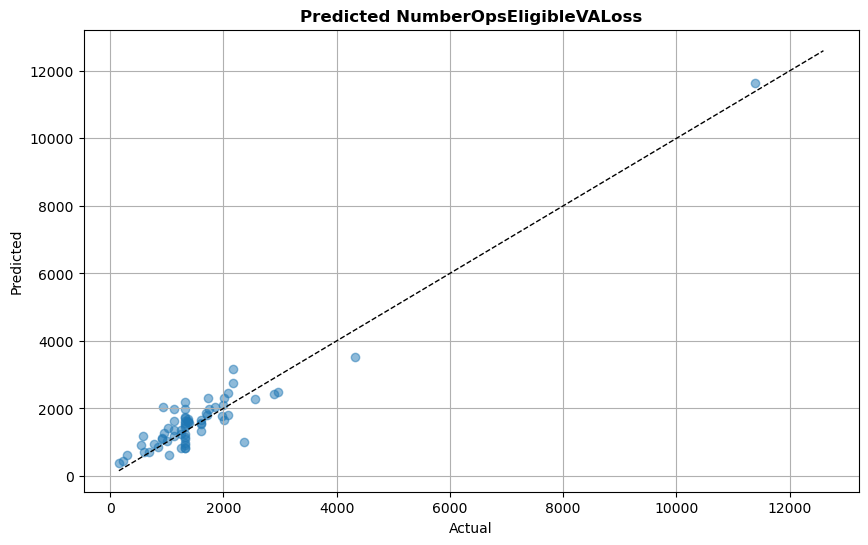

In [52]:
predictor_columns = [
    'NumberOperationsCA',
    'NumberEligibleOperations',
    'NumberOfPatients',
    'NumOpsExcludingBilateral',
    'NumberOpsEligiblePostOpVA',    
    ]

X = imputed_df[predictor_columns]
y = imputed_df['NumberOpsEligibleVALoss']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a linear regression model and fitting it to the data
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.title('Predicted NumberOpsEligibleVALoss', fontweight='bold')
plt.show()

In [53]:
mse, r2

(184028.29183015335, 0.9052568505846011)

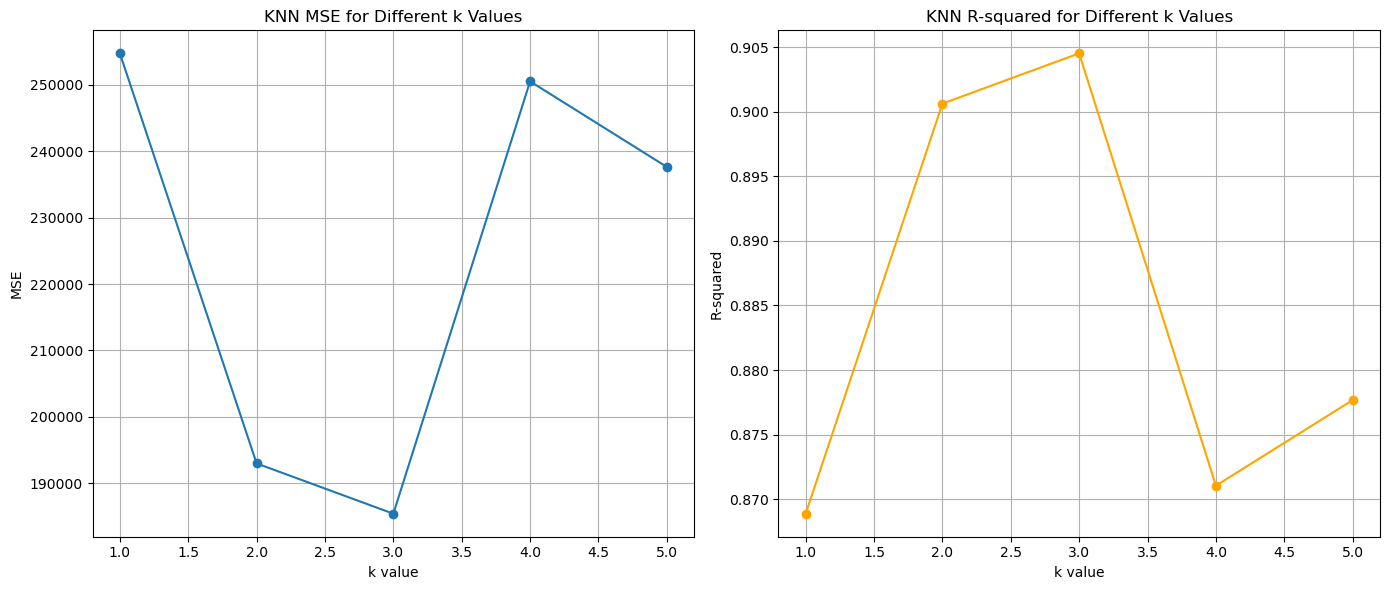

(3, 3, 185447.69572649576, 0.9045260999261313)

In [54]:
k_values = [1, 2, 3, 4, 5]
knn_mse_values = []
knn_r2_values = []

# Iterate over various k values to find the best performance
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the KNN model to the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    knn_y_pred = knn_model.predict(X_test)

    # Calculate performance metrics
    knn_mse_values.append(mean_squared_error(y_test, knn_y_pred))
    knn_r2_values.append(r2_score(y_test, knn_y_pred))


# Plot the performance metrics for different k values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_mse_values, marker='o')
plt.title('KNN MSE for Different k Values')
plt.xlabel('k value')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, knn_r2_values, marker='o', color='orange')
plt.title('KNN R-squared for Different k Values')
plt.xlabel('k value')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate which k value has the best performance based on R-squared and MSE
best_k_mse = k_values[knn_mse_values.index(min(knn_mse_values))]
best_k_r2 = k_values[knn_r2_values.index(max(knn_r2_values))]

best_k_mse, best_k_r2, min(knn_mse_values), max(knn_r2_values)


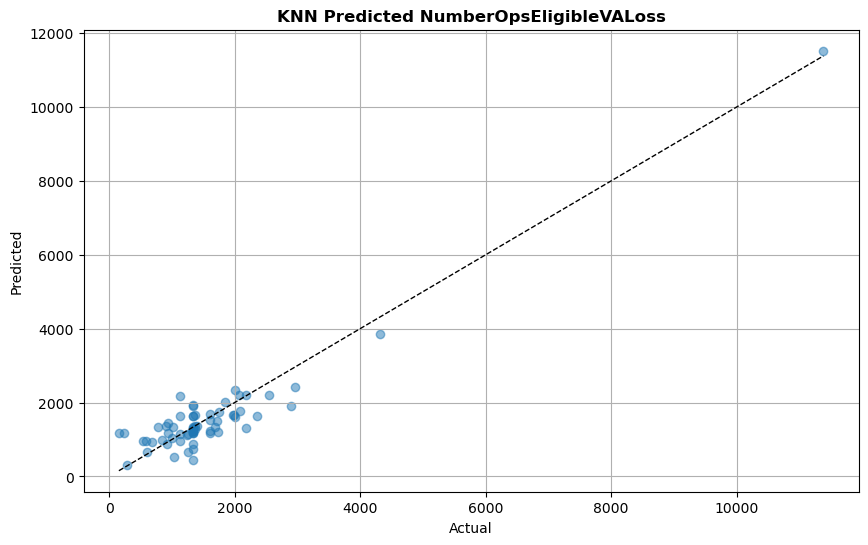

(185447.69572649576, 0.9045260999261313)

In [55]:


# Create the KNN model
knn_model = KNeighborsRegressor(n_neighbors=3)  # n = 3 is the best k value

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_y_pred = knn_model.predict(X_test)

# Calculate performance metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

# Plot actual vs predicted values for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.title('KNN Predicted NumberOpsEligibleVALoss', fontweight='bold')
plt.show()
knn_mse, knn_r2


### VI. Results

<div style="text-align: justify; line-height: 1.5; padding-right:10px;">

Six thousand nine hundred twenty-eight surgeons treated 426524 patients over 594076 operations. The number of eligible operations was 519931, 93% of the total operations. The average number of operations per surgeon is 86. The year-to-year change shows slight variations, primarily due to the global pandemic between 2020 and 2021. The number of patients has dropped during this period, as all NHS trusts operated on emergency cases only. Moorfields Eye Hospital had the most significant change in the number of patients in the NHS Year 2020 when nearly 60% more patients were treated compared to the year before, by 30% more surgeons in the same year. 

Regarding surgical complications, Yeovil District Hospital NHS Foundation Trust had the most significant yearly change in AdjustedPCRRate (1.04;  155%). Southport And Ormskirk Hospital NHS Trust had the most significant rise in the number of consultants (+43;  156% increase), while in the Adjusted Visual Acuity Loss Rate, The Hillingdon Hospitals NHS Foundation Trust had the most significant change in 2018 (1.47; 75%). The median age for the first and second eye operations is similar (3.17& in the first eye and 3.81% in the second eye.) An exciting observation revealed that the number of surgeries performed by consultants does not mean a lower percentage of complications;  Oxford University Hospitals NHS Foundation Trust has a consultant rate of 19.7 %, while the PercentageOpsWithPostOpVA is 64.3 %. At the same time, 
Yeovil District Hospital NHS Foundation Trust consultant rate is 100%, and the percentage of 
'PercentageOpsWithPostOpVA is as high as 78.9 %. The highest colleration in the scope of performance metrics is between UnadjustedPCRRate and AdjustedPCRRate, 0.95.

The linear regression model aimed to predict the number of patients, using the primarily collerated number of operations. To the author's best knowledge, the literature review has not suggested such methods on the national cataract audit datasets. The evaluation metric Mean Square Error is 11597, which is exceptionally high, and the R2 is 0.99, which suggests overfitting. When predicting the number of operations with eligible visual acuity loss, the linear model achieved an MSE of 184028 and an R2 of 0.90. Using the K-Nearest Neighbours algorithm with k = 3, the MSE equals 53095, and the R2 is 0.99. The results are not perfect, but improvements can be expected with more data and feature engineering. 


</div>

### VII. Discussion

<div style="text-align: justify; line-height: 1.5; padding-right:10px;">

In this study, the 5-year national cataract audit between the 2017-2021 NHS years concluded the performances of 43 NHS Trusts that appeared every year within the five years. The data is published by the Royal College of Ophthalmologists and collected from the data.gov.uk domain. The dataset is comprised of dominantly numerical data types. The analysis used operational and surgery quality metrics, the surgeon’s experience, a categorical value, and deidentified patient metrics such as age, mean age, and laterality. The main objective of this research was to identify a change in the outcome of cataract surgeries across the common NHS Trusts in the UK and to find out whether there is a change in the quality of care or the patient demographics. During the data cleaning process, two different data types were created. In one of them, the missing data points were dropped, while in the second one, the missing numerical values were imputed with the median value. The number of trusts in the dropped dataset decreased to 34 from 48. The number of patients dropped from 426524 to 260463, while the number of surgeons from 6928 fell to 4076. The percentage of the total vs eligible operations and the average operations per surgeon remained the same; therefore, we can assume that the mean or average values may remain unaffected. The quality of care overall has a slight variation in the NHS settings for cataracts within the observed period, during which the pandemic affected the patient flow globally.  The demographic data contains a high level of abstraction due to the deidentification, which is valid from an ethical point of view. However, it did serve substantial limitations in finding trends or patterns in patient demographics.

</div>

### VIII. Conclusion

<div style="text-align: justify; line-height: 1.5; padding-right:10px;">

The complete analysis of NHS Trust Performance and Cataract Surgical Outcomes- A Five-Year National Cataract Audit written using Python. The notebook was developed using VS code. 
The datasets of the national cataract survey between 2017-2021 were loaded into the notebook and merged into one data frame, which contained the NHS Trusts that appeared in all five years.  The ethical considerations outlined the dataset's source and ensured that the demographic abstraction prevented any personally identifiable results in this analysis. The Trust names were normalised before the inspection of the dataset, which had a significant amount of missing data. The missing numerical values were treated with median imputation. The imputed dataset has 215 entries and a total of 49 columns. During the analysis, the aggregation function outputs descriptive statistics to understand the distribution of surgeries across different trusts, the average number of operations, median ages and the first and second eye median ages during the operation.  The time series line plot showed the trend in the patient number, where a significant drop happened in the NHS Year 2020. The aggregated plots, using Plotly, conduct an interactive graph of time series. The changes over time function compare descriptive information and the surgical outcomes between trusts, including the NSH Year of the most significant change in the trend, the yearly change, and the percentage of the change. The correlation matrix observed the colleration between the surgical outcome variables. The regression analysis developed predictive models to estimate the number of patients and the number of operations with eligible visual acuity (vision loss). This could help in pre-surgical planning and patient counselling. The models were evaluated, and the K-Nearest Neighbour algorithm had the best outcome. The limitations of the dataset did not provide sufficient results. Still, with additional demographic data from the Electronic Medical Records (EMR) platforms and more frequent time series data, there is a potential to build predictive models that will guide the NHS Trusts to thrive in their quality, preserving patient safety. 


</div>

### References

 [1] [Bourne RRA, Stevens GA, White RA, Smith JL, Flaxman SR, Price H et al. Causes of vision loss worldwide, 1990–2010: a systematic analysis. Lancet Glob Health 2013; 1 (6): e339–e349.]

[2] https://www.moorfields.nhs.uk/service/cataract

[3] https://doi.org/10.1038/eye.2015.3 accessed from https://www.nature.com/articles/eye20153#citeas
 
[4] https://doi.org/10.1038/s41433-023-02668-9